# Test 1

In [ ]:
import numpy as np
from lucifex.fdm import AB2, CN
from lucifex.sim import run, xdmf_to_npz
from lucifex.utils import grid, spacetime_grid, cross_section
from lucifex.viz import plot_colormap, create_animation, plot_line, save_figure, display_animation
from crocodil.dns.system_a import dns_system_a

STORE = 1
WRITE = None
DIR_BASE = './data'
DIR_PARAMS = ('Ra', 'Da', 'epsilon', 'sr', 'cr', 'Nx', 'Ny')

sr = 0.2
simulation = dns_system_a(
    store_delta=STORE, 
    write_delta=WRITE, 
    dir_base=DIR_BASE, 
    dir_params=DIR_PARAMS,
)(
    aspect=2.0,
    Nx=64,
    Ny=64,
    Ra=5e2,
    Da=100.0,
    epsilon=1e-2,
    sr=sr,
    cr=0.0,
    s_limits=(0, sr),
    c_limits=(0, 1),
    c_stabilization=None,
    diagnostic=True,
)

n_stop = 400
dt_init = 1e-6
n_init = 10
run(simulation, n_stop=n_stop, dt_init=dt_init, n_init=n_init)
if WRITE:
    xdmf_to_npz(simulation, delete_xdmf=False)

s, c, u, psi = simulation['s', 'c', 'u', 'psi']

cCorr, sCorr = simulation['cCorr', 'sCorr']
mC, mD = simulation['mC', 'mD']
f, fBoundary = simulation['f', 'fBoundary']
fInterface, fPlus, fMinus = f.sub(0), f.sub(1), f.sub(2)
sMinMax, cMinMax, uMinMax = simulation['sMinMax', 'cMinMax', 'uMinMax']
cMin, cMax = cMinMax.sub(0), cMinMax.sub(1) 
uMax = uMinMax.sub(1)
dt, dtCFL, dtK = simulation['dt', 'dtCFL', 'dtK']

In [2]:
time_slice = slice(0, None, 2)
titles = [f'${c.name}(t={t:.3f})$' for t in c.time_series[time_slice]]

anim = create_animation(
    plot_colormap,
    colorbar=False,
)(c.series[time_slice], title=titles)
anim_path = save_figure(f'{c.name}(t)', simulation.dir_path, get_path=True)(anim)

display_animation(anim_path)

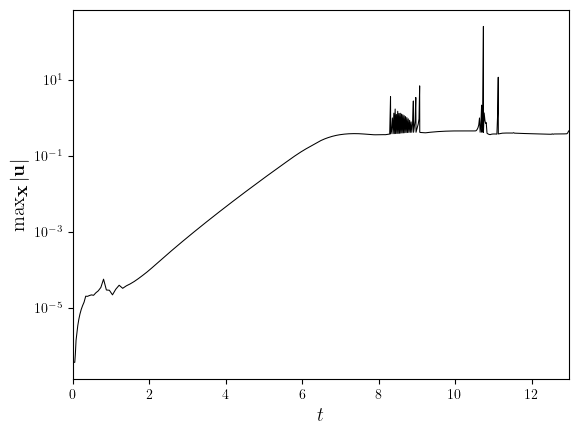

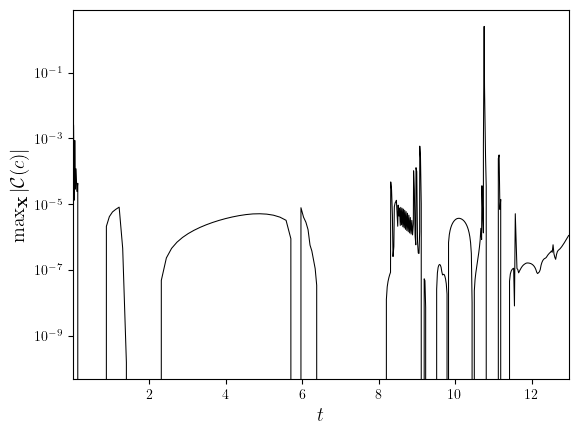

: 

In [ ]:
fig, ax = plot_line(
    (uMax.time_series, uMax.value_series),
    x_label='$t$',
    y_label='$\max_{\\textbf{x}}|\\textbf{u}|$',
)
ax.set_yscale('log')
save_figure('uMax(t)', simulation.dir_path)(fig)

fig, ax = plot_line(
    (cCorr.time_series, [np.max(np.abs(i)) for i in cCorr.dofs_series]),
    x_label='$t$',
    y_label='$\max_{\\textbf{x}}|\mathcal{C}(c)|$',
)
ax.set_yscale('log')

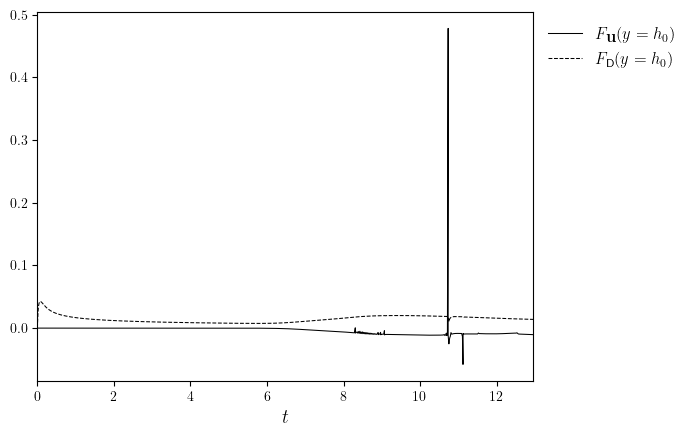

In [ ]:
fig, ax = plot_line(
    (fInterface.time_series, fInterface.value_series),
    cyc='black',
    x_label='$t$',
    legend_labels=['$F_{\\textbf{u}}(y=h_0)$', '$F_{\mathsf{D}}(y=h_0)$'],
)
save_figure('fInterface(t)', simulation.dir_path)(fig)

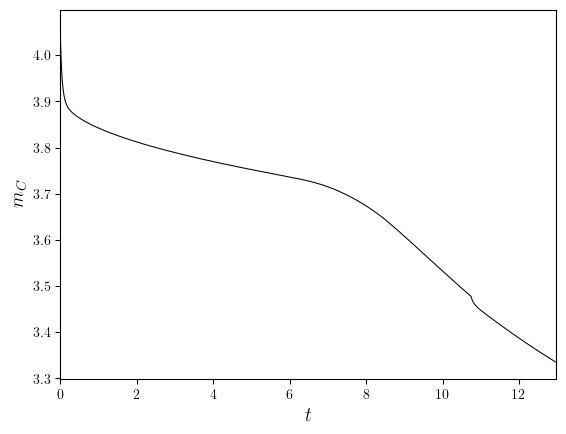

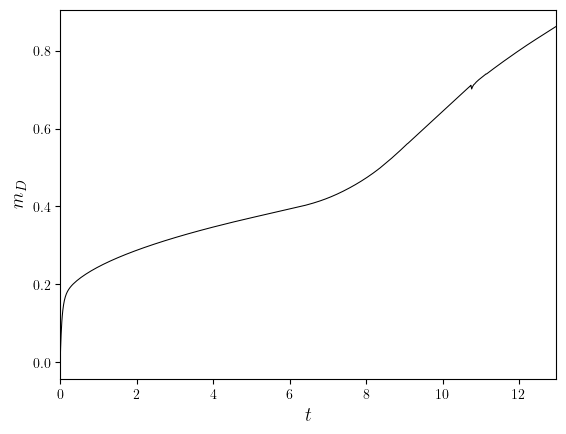

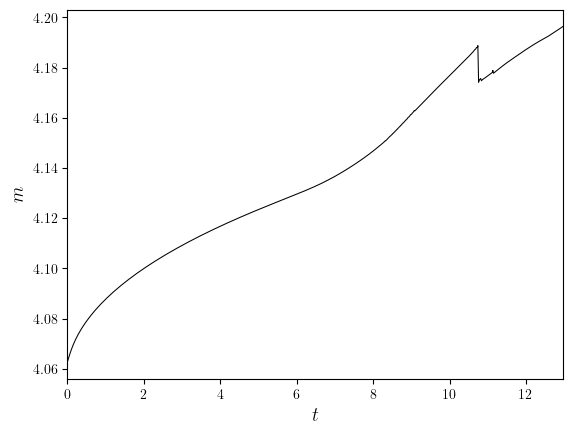

In [ ]:
fig, ax = plot_line(
    (mC.time_series, mC.value_series),
    x_label='$t$',
    y_label='$m_C$',
)
save_figure('mC(t)', simulation.dir_path)(fig)

fig, ax = plot_line(
    (mD.time_series, mD.value_series),
    x_label='$t$',
    y_label='$m_D$'
)
save_figure('mD(t)', simulation.dir_path)(fig)

fig, ax = plot_line(
    (mC.time_series, [i + j for i, j in zip(mC.value_series, mD.value_series)]),
    x_label='$t$',
    y_label='$m$'
)
save_figure('m(t)', simulation.dir_path)(fig)